# Exploratory data analysis (EDA) - target label shID
Relationships between features and the target labels were investigated, leading to the selection of essential features for machine learning tasks.
This analysis explored the required insulin dose (shID), which is contingent upon various internal and external factors.

### Imports

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

### Prepare data
#### Read data

In [2]:
# Read the data in csv format
df = pd.read_csv('/Users/polzovatel/Desktop/Python/Portfolio/Diabetes_3/1_2_Preprocessing/FullData_preprocessed.csv')
df

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 07:00:00,B-L,1.756,4.7,4.7,3.0,3.5,1820,-16,74
1,2022-12-09 18:00:00,D-B,3.442,4.3,6.5,2.0,4.0,18,-12,69
2,2022-12-10 07:00:00,B-L,1.584,6.5,5.6,3.0,4.0,2607,-13,77
3,2022-12-10 12:00:00,L-D,2.562,5.6,6.2,2.5,2.0,2067,-12,66
4,2022-12-10 18:00:00,D-B,4.190,6.2,6.1,2.0,3.5,487,-12,66
...,...,...,...,...,...,...,...,...,...,...
198,2023-02-24 12:00:00,L-D,2.194,6.5,6.2,3.0,3.0,1715,-10,66
199,2023-02-24 18:00:00,D-B,2.389,6.2,5.1,3.0,2.5,0,-9,66
200,2023-02-25 07:00:00,B-L,1.706,5.1,6.7,3.0,3.0,1505,-15,65
201,2023-02-25 12:00:00,L-D,1.952,6.7,3.8,3.0,3.0,68,-11,56


The final preprocessed data frame includes several columns with the following information:

- ['shID']: Target label
- ['Interval']: Meal time
- ['DV']: Dietary value in bread units
- ['BG1']: Pre-meal blood glucose
- ['bID']: Basal insulin dose delivered before the meal
- ['SC']: Step count during the interval
- ['Temp']: Outside temperature during the interval
- ['Humid']: Outside humidity during the interval

The remaining columns are irrelevant for the analysis. Due to insufficient data for a complete year (only two months available), ['Date'] is excluded from the research. The post-meal blood glucose ['BG2'] is not considered as it occurs after insulin delivery and represents a consequence rather than an influencing factor. This feature is used for data filtering to ensure that only observations where the post-meal blood glucose ['BG2'] falls within the normal range are included, and therefore the insulin dose was calculated accurately.

#### Filter data

In [3]:
# Retrieve only the rows where the post-meal blood glucose level falls within the normal range.
df_norm_BG2 = df[(df['BG2']>3.9)&(df['BG2']<5.5)].reset_index(drop=True)

In [4]:
df_norm_BG2

,Date,Interval,DV,BG1,BG2,bID,shID,SC,Temp,Humid
0,2022-12-09 07:00:00,B-L,1.756,4.7,4.7,3.0,3.5,1820,-16,74
1,2022-12-11 18:00:00,D-B,2.639,7.1,4.2,2.0,3.5,20,-13,63
2,2022-12-12 07:00:00,B-L,1.763,4.2,5.1,3.0,3.5,2430,-19,79
3,2022-12-12 18:00:00,D-B,2.740,6.6,5.3,2.0,3.5,12,-11,56
4,2022-12-13 07:00:00,B-L,1.834,5.3,4.8,3.0,3.5,2392,-14,81
...,...,...,...,...,...,...,...,...,...,...
108,2023-02-22 12:00:00,L-D,2.105,4.3,4.3,3.0,2.5,5812,-10,48
109,2023-02-23 07:00:00,B-L,1.872,3.8,4.4,3.0,3.0,2249,-16,72
110,2023-02-23 18:00:00,D-B,2.376,5.9,4.6,3.0,2.5,20,-6,61
111,2023-02-24 18:00:00,D-B,2.389,6.2,5.1,3.0,2.5,0,-9,66


### Statistical values of the features
####  Features correlation

In [5]:
# Create a df with selected columns (features and target)
X = df_norm_BG2[['shID','Interval','DV','BG1','bID','SC','Temp','Humid']]

In [8]:
# Preprocess the data
X = pd.get_dummies(X)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data,columns=X.columns)
scaled_X

,shID,DV,BG1,bID,SC,Temp,Humid,Interval_B-L,Interval_D-B,Interval_L-D
0,0.375,0.091754,0.333333,0.5,0.313145,0.538462,0.685185,1.0,0.0,0.0
1,0.375,0.448666,0.904762,0.0,0.003441,0.653846,0.481481,0.0,1.0,0.0
2,0.375,0.094584,0.214286,0.5,0.418100,0.423077,0.777778,1.0,0.0,0.0
3,0.375,0.489491,0.785714,0.0,0.002065,0.730769,0.351852,0.0,1.0,0.0
4,0.375,0.123282,0.476190,0.5,0.411562,0.615385,0.814815,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
108,0.125,0.232821,0.238095,0.5,1.000000,0.769231,0.203704,0.0,0.0,1.0
109,0.250,0.138642,0.119048,0.5,0.386958,0.538462,0.648148,1.0,0.0,0.0
110,0.125,0.342361,0.619048,0.5,0.003441,0.923077,0.444444,0.0,1.0,0.0
111,0.125,0.347615,0.690476,0.5,0.000000,0.807692,0.537037,0.0,1.0,0.0


In [7]:
# Get correlaton values
shID_corr = scaled_X.corr()['shID'][1:]
shID_corr = shID_corr.sort_values()
shID_corr

Interval_L-D   -0.242462
SC             -0.222203
bID            -0.158533
Temp           -0.000846
Interval_D-B    0.106833
Interval_B-L    0.131866
Humid           0.274535
DV              0.363860
BG1             0.415186
Name: shID, dtype: float64

#### Interacting features correlation

In [9]:
# Create a data frame with features only
data_for_interaction = scaled_X[['DV', 'BG1', 'bID', 'SC', 'Temp', 'Humid']]
data_for_interaction

,DV,BG1,bID,SC,Temp,Humid
0,0.091754,0.333333,0.5,0.313145,0.538462,0.685185
1,0.448666,0.904762,0.0,0.003441,0.653846,0.481481
2,0.094584,0.214286,0.5,0.418100,0.423077,0.777778
3,0.489491,0.785714,0.0,0.002065,0.730769,0.351852
4,0.123282,0.476190,0.5,0.411562,0.615385,0.814815
...,...,...,...,...,...,...
108,0.232821,0.238095,0.5,1.000000,0.769231,0.203704
109,0.138642,0.119048,0.5,0.386958,0.538462,0.648148
110,0.342361,0.619048,0.5,0.003441,0.923077,0.444444
111,0.347615,0.690476,0.5,0.000000,0.807692,0.537037


In [10]:
# A list of columns with features and their interactions
interaction_columns = list(data_for_interaction.columns)
for i,c in enumerate(data_for_interaction.columns):   
    start = i+1
    for i in range(start, len(data_for_interaction.columns)):
        interaction_columns.append(f'{c}:{data_for_interaction.columns[i]}')
interaction_columns 

['DV',
 'BG1',
 'bID',
 'SC',
 'Temp',
 'Humid',
 'DV:BG1',
 'DV:bID',
 'DV:SC',
 'DV:Temp',
 'DV:Humid',
 'BG1:bID',
 'BG1:SC',
 'BG1:Temp',
 'BG1:Humid',
 'bID:SC',
 'bID:Temp',
 'bID:Humid',
 'SC:Temp',
 'SC:Humid',
 'Temp:Humid']

In [11]:
# Generate interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(data_for_interaction)
# Create a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = interaction_columns)

In [12]:
interaction_df.iloc[:,6:]

,DV:BG1,DV:bID,DV:SC,DV:Temp,DV:Humid,BG1:bID,BG1:SC,BG1:Temp,BG1:Humid,bID:SC,bID:Temp,bID:Humid,SC:Temp,SC:Humid,Temp:Humid
0,0.030585,0.045877,0.028732,0.049406,0.062869,0.166667,0.104382,0.179487,0.228395,0.156573,0.269231,0.342593,0.168617,0.214562,0.368946
1,0.405936,0.000000,0.001544,0.293359,0.216024,0.000000,0.003113,0.591575,0.435626,0.000000,0.000000,0.000000,0.002250,0.001657,0.314815
2,0.020268,0.047292,0.039545,0.040016,0.073565,0.107143,0.089593,0.090659,0.166667,0.209050,0.211538,0.388889,0.176889,0.325189,0.329060
3,0.384600,0.000000,0.001011,0.357705,0.172228,0.000000,0.001622,0.574176,0.276455,0.000000,0.000000,0.000000,0.001509,0.000726,0.257123
4,0.058706,0.061641,0.050738,0.075866,0.100452,0.238095,0.195982,0.293040,0.388007,0.205781,0.307692,0.407407,0.253269,0.335347,0.501425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.055434,0.116411,0.232821,0.179093,0.047427,0.119048,0.238095,0.183150,0.048501,0.500000,0.384615,0.101852,0.769231,0.203704,0.156695
109,0.016505,0.069321,0.053649,0.074653,0.089860,0.059524,0.046066,0.064103,0.077160,0.193479,0.269231,0.324074,0.208362,0.250806,0.349003
110,0.211937,0.171180,0.001178,0.316025,0.152160,0.309524,0.002130,0.571429,0.275132,0.001721,0.461538,0.222222,0.003176,0.001529,0.410256
111,0.240020,0.173808,0.000000,0.280766,0.186682,0.345238,0.000000,0.557692,0.370811,0.000000,0.403846,0.268519,0.000000,0.000000,0.433761


In [13]:
# Concatenate the main dataframe with intervals as dummies with the interaction terms
data_wd_wi = pd.concat([scaled_X,interaction_df.iloc[:,6:]],axis=1)
data_wd_wi

,shID,DV,BG1,bID,SC,Temp,Humid,Interval_B-L,Interval_D-B,Interval_L-D,...,BG1:bID,BG1:SC,BG1:Temp,BG1:Humid,bID:SC,bID:Temp,bID:Humid,SC:Temp,SC:Humid,Temp:Humid
0,0.375,0.091754,0.333333,0.5,0.313145,0.538462,0.685185,1.0,0.0,0.0,...,0.166667,0.104382,0.179487,0.228395,0.156573,0.269231,0.342593,0.168617,0.214562,0.368946
1,0.375,0.448666,0.904762,0.0,0.003441,0.653846,0.481481,0.0,1.0,0.0,...,0.000000,0.003113,0.591575,0.435626,0.000000,0.000000,0.000000,0.002250,0.001657,0.314815
2,0.375,0.094584,0.214286,0.5,0.418100,0.423077,0.777778,1.0,0.0,0.0,...,0.107143,0.089593,0.090659,0.166667,0.209050,0.211538,0.388889,0.176889,0.325189,0.329060
3,0.375,0.489491,0.785714,0.0,0.002065,0.730769,0.351852,0.0,1.0,0.0,...,0.000000,0.001622,0.574176,0.276455,0.000000,0.000000,0.000000,0.001509,0.000726,0.257123
4,0.375,0.123282,0.476190,0.5,0.411562,0.615385,0.814815,1.0,0.0,0.0,...,0.238095,0.195982,0.293040,0.388007,0.205781,0.307692,0.407407,0.253269,0.335347,0.501425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.125,0.232821,0.238095,0.5,1.000000,0.769231,0.203704,0.0,0.0,1.0,...,0.119048,0.238095,0.183150,0.048501,0.500000,0.384615,0.101852,0.769231,0.203704,0.156695
109,0.250,0.138642,0.119048,0.5,0.386958,0.538462,0.648148,1.0,0.0,0.0,...,0.059524,0.046066,0.064103,0.077160,0.193479,0.269231,0.324074,0.208362,0.250806,0.349003
110,0.125,0.342361,0.619048,0.5,0.003441,0.923077,0.444444,0.0,1.0,0.0,...,0.309524,0.002130,0.571429,0.275132,0.001721,0.461538,0.222222,0.003176,0.001529,0.410256
111,0.125,0.347615,0.690476,0.5,0.000000,0.807692,0.537037,0.0,1.0,0.0,...,0.345238,0.000000,0.557692,0.370811,0.000000,0.403846,0.268519,0.000000,0.000000,0.433761


In [15]:
# Get correlation values
shID_corr_interaction = data_wd_wi.corr()['shID'][1:]
shID_corr_interaction

DV              0.363860
BG1             0.415186
bID            -0.158533
SC             -0.222203
Temp           -0.000846
Humid           0.274535
Interval_B-L    0.131866
Interval_D-B    0.106833
Interval_L-D   -0.242462
DV:BG1          0.486328
DV:bID          0.171495
DV:SC          -0.181403
DV:Temp         0.292216
DV:Humid        0.488231
BG1:bID         0.217225
BG1:SC          0.080980
BG1:Temp        0.302826
BG1:Humid       0.485562
bID:SC         -0.155133
bID:Temp       -0.131470
bID:Humid       0.048850
SC:Temp        -0.153452
SC:Humid       -0.085394
Temp:Humid      0.208824
Name: shID, dtype: float64

#### P-values

In [18]:
# Define X features and y label 
X = data_wd_wi.drop('shID',axis=1)
y = data_wd_wi['shID']
X = sm.add_constant(X)

In [19]:
# Create an OLS model
model = sm.OLS(y,X).fit()

In [20]:
# Extract p-values
pvalues = model.pvalues[1:]
pvalues

DV              0.054177
BG1             0.786958
bID             0.735093
SC              0.076160
Temp            0.922440
Humid           0.012323
Interval_B-L    0.000221
Interval_D-B    0.000047
Interval_L-D    0.769358
DV:BG1          0.891393
DV:bID          0.978724
DV:SC           0.060272
DV:Temp         0.724680
DV:Humid        0.085171
BG1:bID         0.547427
BG1:SC          0.180125
BG1:Temp        0.822212
BG1:Humid       0.104519
bID:SC          0.001728
bID:Temp        0.465901
bID:Humid       0.000194
SC:Temp         0.742803
SC:Humid        0.635169
Temp:Humid      0.203299
dtype: float64

#### // Combine the values into a dataframe

In [22]:
features_stats = pd.DataFrame({'feature' : shID_corr_interaction.index,
                               'correlation' : shID_corr_interaction.values,
                               'p-values' : pvalues.values})
features_stats.sort_values('correlation',inplace=True)
features_stats.reset_index(drop=True,inplace=True)
features_stats

,feature,correlation,p-values
0,Interval_L-D,-0.242462,0.769358
1,SC,-0.222203,0.076160
2,DV:SC,-0.181403,0.060272
3,bID,-0.158533,0.735093
4,bID:SC,-0.155133,0.001728
5,SC:Temp,-0.153452,0.742803
6,bID:Temp,-0.131470,0.465901
7,SC:Humid,-0.085394,0.635169
8,Temp,-0.000846,0.922440
9,bID:Humid,0.048850,0.000194


In [23]:
# Save the data frame
features_stats.to_csv('features_stats.csv',index=False)

### Visualisations

#### Features correlation and interactions

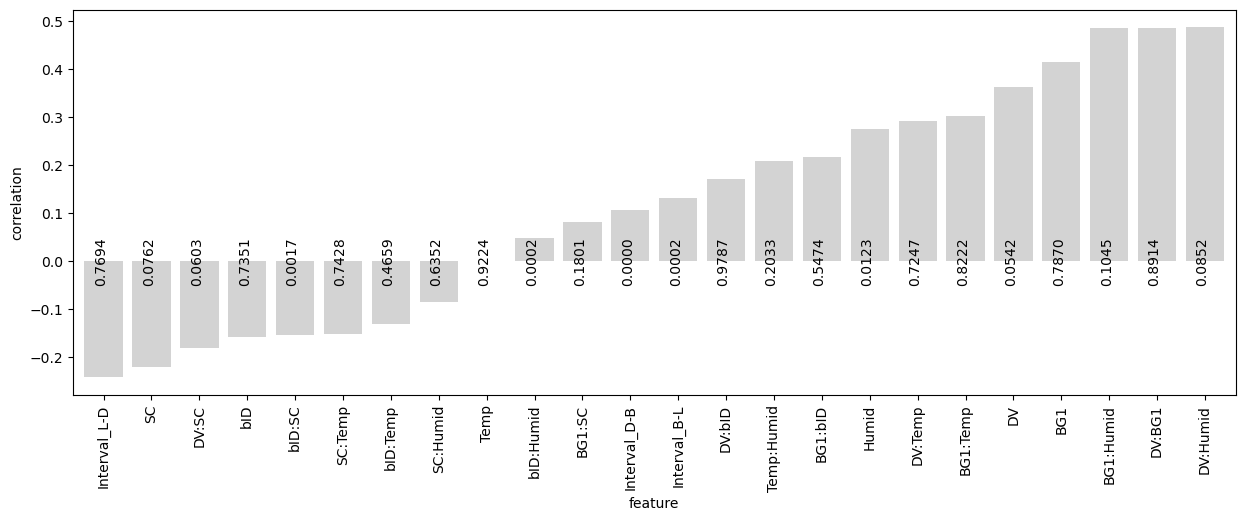

In [24]:
# Plot features correlation with pvalues
plt.figure(figsize=(15,5))
ax = sns.barplot(data=features_stats,x='feature',y='correlation',color='lightgrey')
for p in ax.patches:
    ax.annotate("%.4f" % features_stats[features_stats['correlation']==p.get_height()]['p-values'], 
                (p.get_x()+0.2, 0),va='center',rotation=90)
plt.margins(x=0.01)
plt.xticks(rotation=90);

####  Results

The barplot reveals that the most strongly correlated single features are ['BG1'] and ['DV'], with ['DV'] exhibiting higher statistical significance (p-value 0.0542) compared to ['BG1'] (p-value 0.7870). Both features show an increase in correlation when interacting with each other and ['Humid']. This explains why ['Humid'] alone has a low correlation value but exhibits high statistical significance. On the other hand, ['Temp'] decreases the correlation between ['DV'] and ['BG1'] when they interact, while not being statistically significant on its own. ['Interval'] demonstrates very high statistical significance and a low correlation for breakfast and dinner, but shows a more negative correlation during lunch. There is also some negative correlation observed in ['SC']. However, ['bID'] does not exhibit either high correlation or statistical significance.

####  Intervals

<AxesSubplot: xlabel='Interval', ylabel='count'>

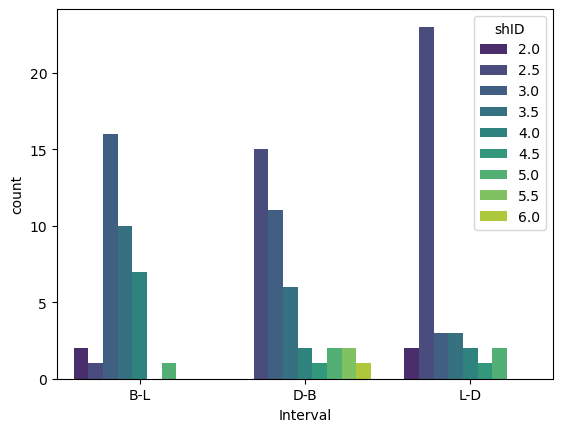

In [25]:
# Explore shID levels per interval
sns.countplot(data=df_norm_BG2,x='Interval',hue='shID',palette='viridis')

#### Results

The barplot illustrates distinct patterns in shID doses across different intervals. Specifically, during the lunch-dinner interval, the majority of doses are low (around 2.5), whereas higher doses (>5) are observed during the dinner-breakfast interval. In contrast, the breakfast-lunch interval shows a predominance of doses at the medium level (ranging from 3 to 4).

The analysis of shID doses based on the intervals reveals varying dosage patterns throughout the day. The findings suggest a potential relationship between meal times and the dosage levels of shID, with higher doses observed during the dinner-breakfast interval and lower doses during the lunch-dinner interval. 

As a result, the data frame was partitioned into three sub-dataframes based on the intervals to facilitate further analysis.

In [26]:
# Partitioning based on the interval
df_BL = df_norm_BG2[df_norm_BG2['Interval']=='B-L']
df_LD = df_norm_BG2[df_norm_BG2['Interval']=='L-D']
df_DB = df_norm_BG2[df_norm_BG2['Interval']=='D-B']

In [27]:
# Assigning names for future referencing in the loops
df_BL.name = 'Interval_breakfast-lunch'
df_LD.name = 'Interval_lunch-dinner'
df_DB.name = 'Interval_dinner-breakfast'

In [28]:
# A list of created sub-dataframes
dfs = [df_BL,df_LD,df_DB]

#### Numeric features

In [29]:
feats = ['DV','BG1','bID','SC','Temp','Humid']

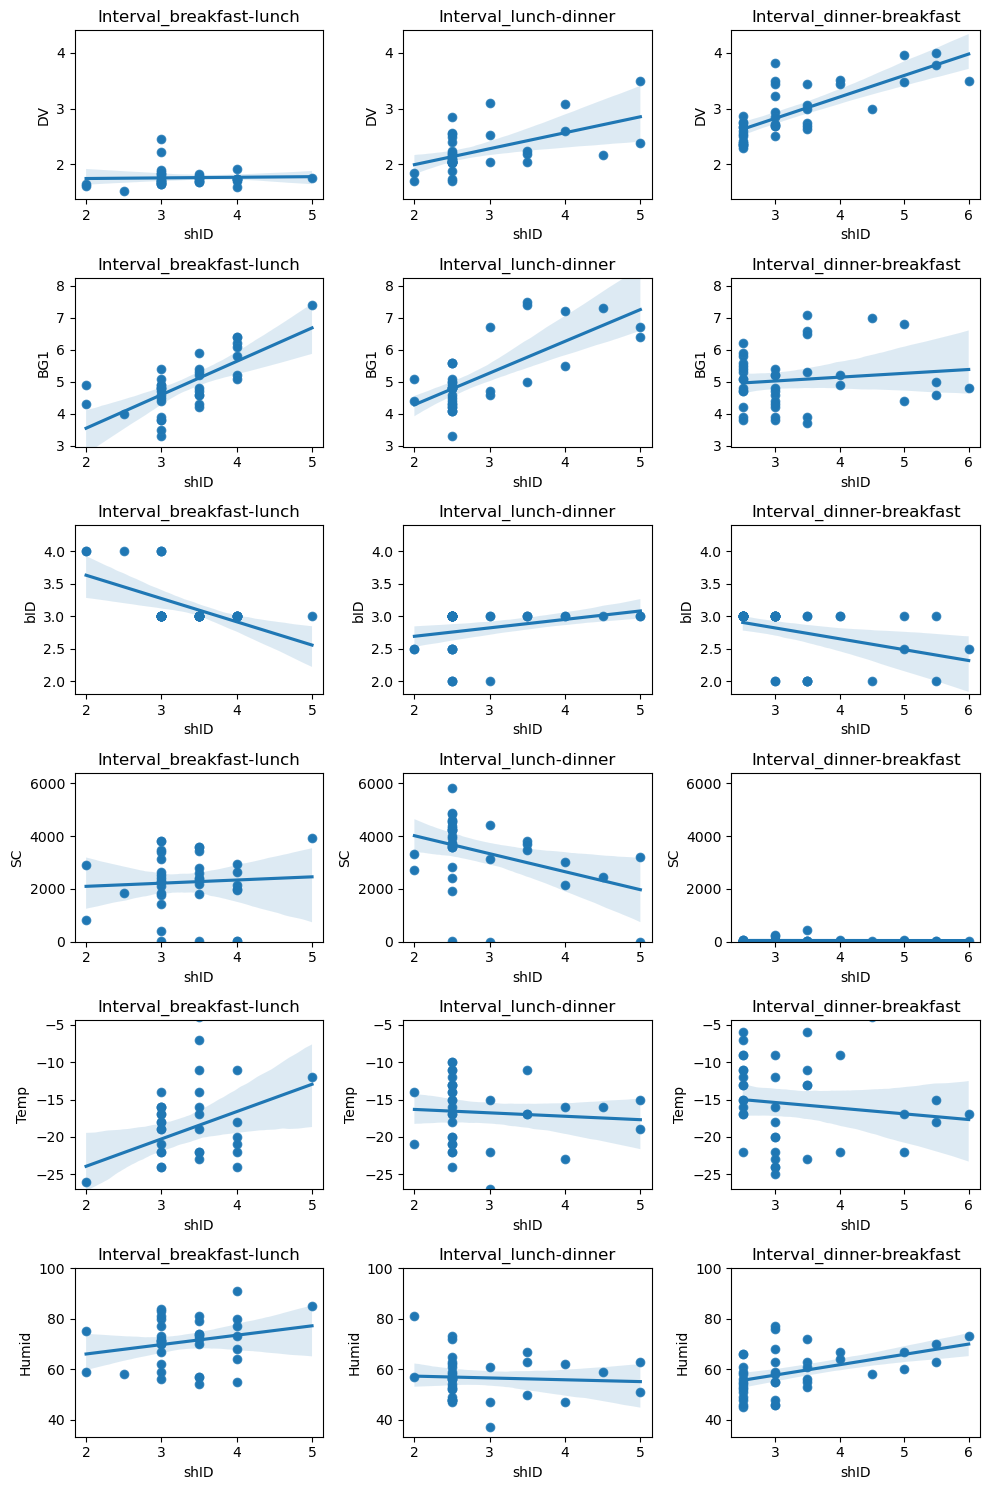

In [30]:
fig,ax = plt.subplots(nrows=len(feats),ncols=len(dfs),figsize=(10,15))

for i,d in enumerate(dfs):
    
    for j,f in enumerate(feats):
    
        sns.scatterplot(data=d,x='shID',y=f,ax=ax[j,i])
        sns.regplot(data=d,x='shID',y=f,ax=ax[j,i])
        ax[j,i].set_title(d.name)
        ax[j,i].set_ylim(df_norm_BG2[f].min()*0.9,df_norm_BG2[f].max()*1.1)
    
plt.tight_layout();

#### Results

['DV'] The above visualization demonstrates an increase in correlation from breakfast through lunch to dinner, while its correlation is almost non-existent after breakfast and very high after dinner. Notably, the amount of consumed carbs follows a similar pattern, which could explain the change in correlation observed.

['BG1'] In contrast, blood glucose levels are evenly distributed throughout the day. However, the correlation visibly decreases, being higher in the morning and lower in the evening. This observation aligns with the influence of ['DV'], which becomes more prominent in the evening and diminishes the impact of ['BG1'].

['bID'] The visualization confirms the previously discovered low correlation for ['bID'].

['SC'] The graph indicates that step count has a visibly negative effect on the insulin dose size, particularly during the lunch-dinner period when the step count is higher compared to the other two intervals. This suggests that only a high level of activity significantly decreases insulin sensitivity.

['Temp'] The visualization of the influence of temperature yields mixed results, providing a foundation for further exploration.

['Humid'] The plot demonstrates a clearer pattern for humidity, with a positive correlation observed after dinner and minimal effect after breakfast and lunch.

####  BG1:DV interaction

In [38]:
# DV threshold 
DV_threshold = df_norm_BG2['DV'].median()
DV_threshold

2.19

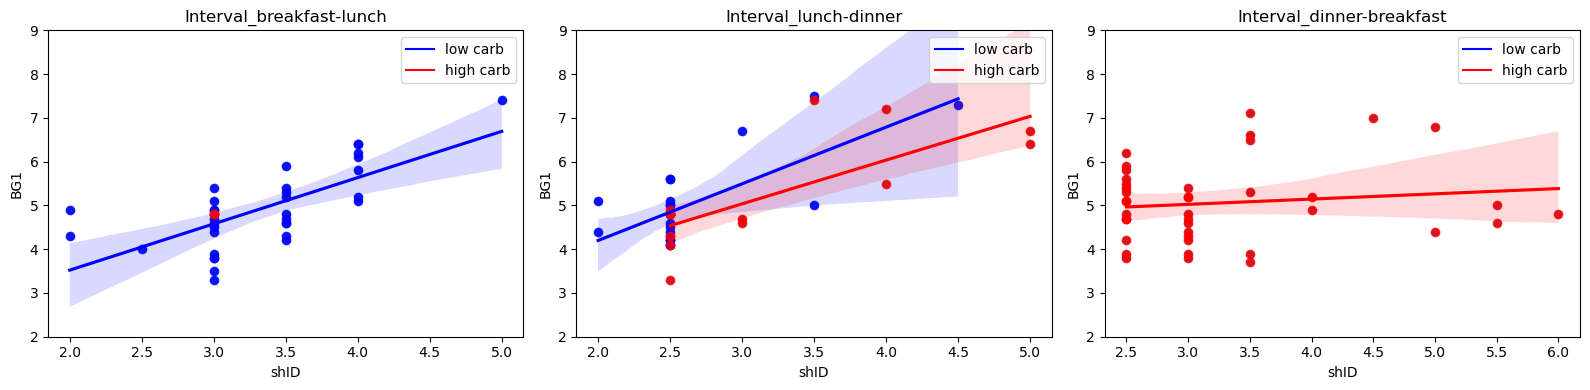

In [44]:
# BG1:DV
fig,ax = plt.subplots(nrows=1,ncols=len(dfs),figsize=(16,4))

for i,d in enumerate(dfs):
    
    sns.scatterplot(data=d,x='shID',y='BG1',ax=ax[i])
    sns.regplot(data=d[d['DV']<DV_threshold],x='shID',y='BG1',ax=ax[i],color='blue')
    sns.regplot(data=d[d['DV']>DV_threshold],x='shID',y='BG1',ax=ax[i],color='red')
    ax[i].set_title(d.name)
    ax[i].set_ylim(2,9)
    blue_line = plt.Line2D([], [], color='blue', label='low carb')
    red_line = plt.Line2D([], [], color='red', label='high carb')
    ax[i].legend(handles=[blue_line, red_line])


plt.tight_layout();

In [40]:
# BG1 threshold (blood glucose within 3.9 to 5.5 is considered to be normal)
BG1_threshold = 5.5

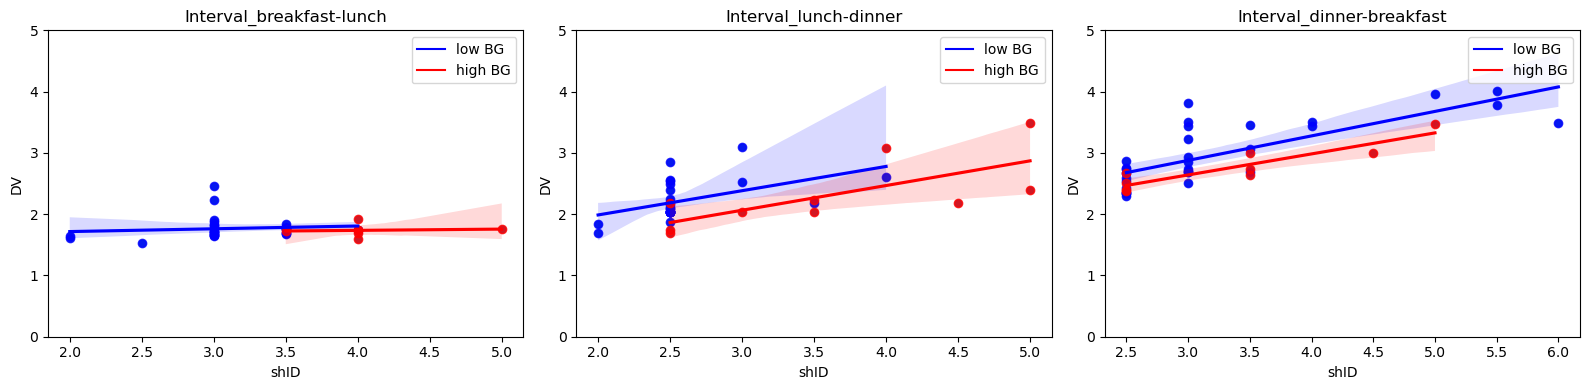

In [45]:
# DV:BG1
fig,ax = plt.subplots(nrows=1,ncols=len(dfs),figsize=(16,4))

for i,d in enumerate(dfs):
    
    sns.scatterplot(data=d,x='shID',y='DV',ax=ax[i])
    sns.regplot(data=d[d['BG1']<=BG1_threshold],x='shID',y='DV',ax=ax[i],color='blue')
    sns.regplot(data=d[d['BG1']>BG1_threshold],x='shID',y='DV',ax=ax[i],color='red')

    ax[i].set_title(d.name)
    ax[i].set_ylim(0,5)
    
    blue_line = plt.Line2D([], [], color='blue', label='low BG')
    red_line = plt.Line2D([], [], color='red', label='high BG')
    ax[i].legend(handles=[blue_line, red_line])

plt.tight_layout();

#### Results

['DV'] + ['BG1'] The above plots provide insights into the relationship between carb intake, blood glucose level, and the impact on insulin dose. It is evident that higher carb intake reduces the influence of high blood glucose on the required insulin dose. However, the blood glucose level does not appear to affect the impact of carb intake on the required insulin dose.

#### BG1:DV:Humid interaction

In [46]:
# Humid threshold
Humid_threshold = df_norm_BG2['Humid'].median()
Humid_threshold

61.0

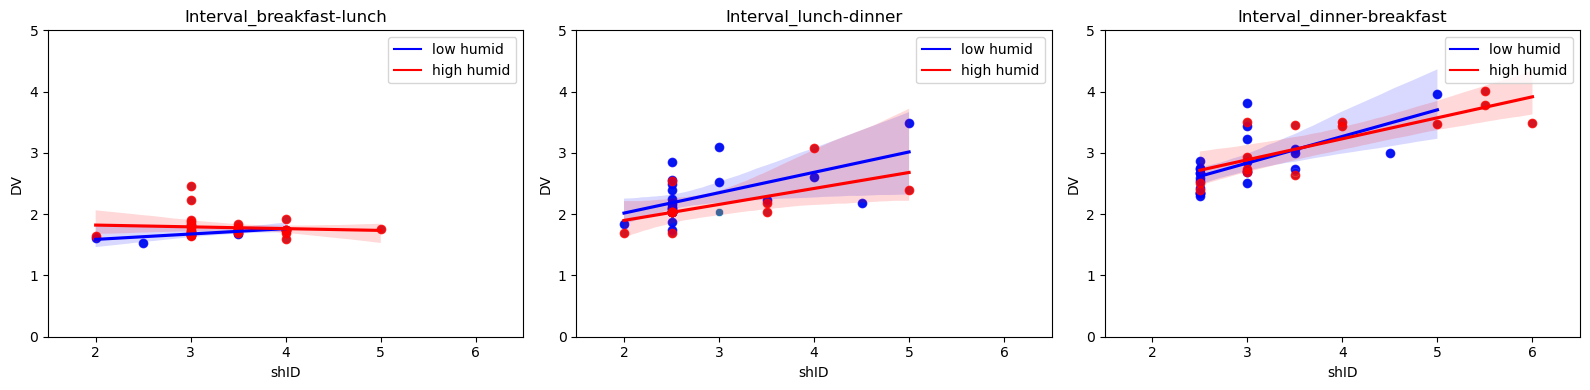

In [52]:
# DV:Humid
fig,ax = plt.subplots(nrows=1,ncols=len(dfs),figsize=(16,4))

for i,d in enumerate(dfs):
    
    sns.scatterplot(data=d,x='shID',y='DV',ax=ax[i])
    sns.regplot(data=d[d['Humid']<Humid_threshold],x='shID',y='DV',ax=ax[i],color='blue')
    sns.regplot(data=d[d['Humid']>Humid_threshold],x='shID',y='DV',ax=ax[i],color='red')

    ax[i].set_title(d.name)
    ax[i].set_xlim(1.5,6.5)
    ax[i].set_ylim(0,5)
    
    blue_line = plt.Line2D([], [], color='blue', label='low humid')
    red_line = plt.Line2D([], [], color='red', label='high humid')
    ax[i].legend(handles=[blue_line, red_line])

plt.tight_layout();

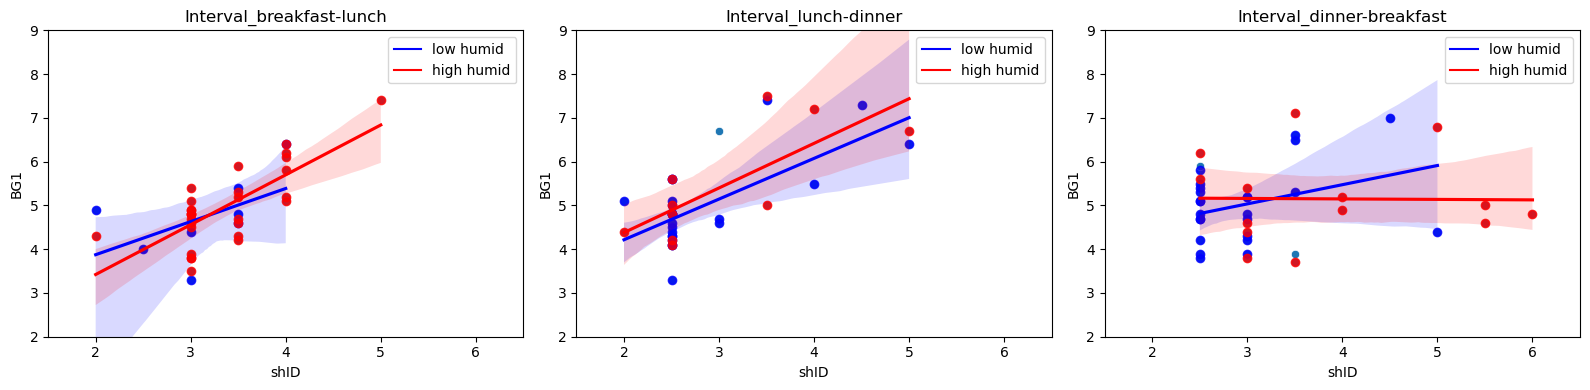

In [53]:
# BG1:Humid
fig,ax = plt.subplots(nrows=1,ncols=len(dfs),figsize=(16,4))

for i,d in enumerate(dfs):
   
    sns.scatterplot(data=d,x='shID',y='BG1',ax=ax[i])
    sns.regplot(data=d[d['Humid']<Humid_threshold],x='shID',y='BG1',ax=ax[i],color='blue')
    sns.regplot(data=d[d['Humid']>Humid_threshold],x='shID',y='BG1',ax=ax[i],color='red')
    ax[i].set_title(d.name)
    ax[i].set_xlim(1.5,6.5)
    ax[i].set_ylim(2,9)
        
    blue_line = plt.Line2D([], [], color='blue', label='low humid')
    red_line = plt.Line2D([], [], color='red', label='high humid')
    ax[i].legend(handles=[blue_line, red_line])
        
plt.tight_layout();

####  Results

['DV'] + ['BG1'] + ['Humid'] Higher humidity levels tend to diminish the effect of carb intake throughout the day and the effect of pre-meal blood glucose levels after dinner, resulting in a lower insulin dose requirement. Conversely, higher humidity levels slightly amplify the impact of blood glucose levels on the insulin dose, especially in the morning after breakfast, leading to an increased insulin dose requirement. Therefore, humidity levels act as a modulating factor, modifying the influence of carb intake and pre-meal blood glucose levels on the required insulin dose.

These findings highlight the need for ongoing research and exploration in developing machine learning algorithms that can account for various environmental factors, such as humidity, in real-time diabetes management. By incorporating dynamic environmental data into the algorithm, it may be possible to provide more personalized and precise insulin dosage recommendations.

####  BG1:DV:Temp interaction

In [50]:
# Temp threshold
Temp_threshold = df_norm_BG2['Temp'].median()
Temp_threshold

-17.0

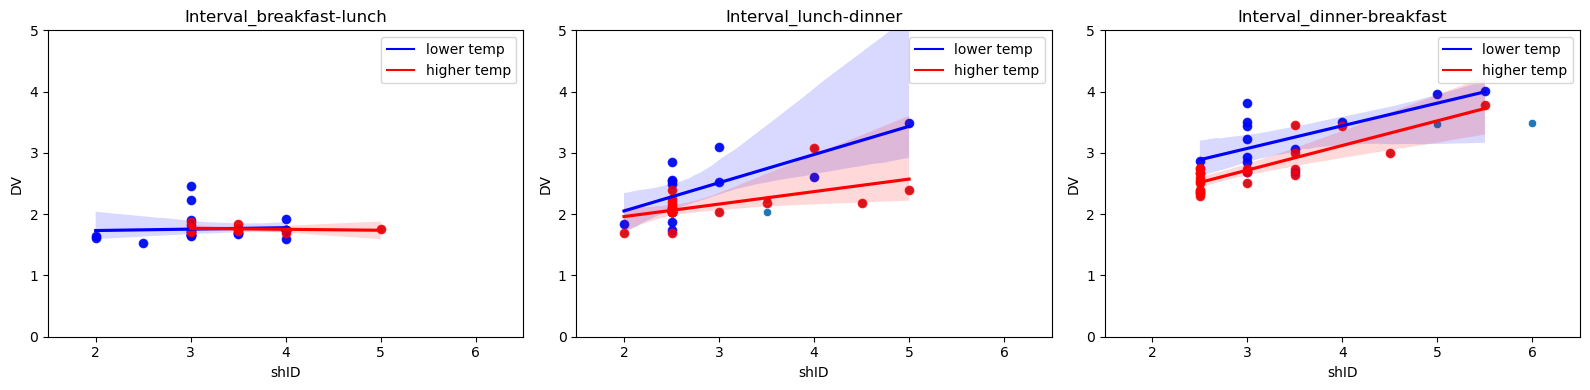

In [56]:
# DV:Temp
fig,ax = plt.subplots(nrows=1,ncols=len(dfs),figsize=(16,4))

for i,d in enumerate(dfs):
   
    sns.scatterplot(data=d,x='shID',y='DV',ax=ax[i])
    sns.regplot(data=d[d['Temp']<Temp_threshold],x='shID',y='DV',ax=ax[i],color='blue')
    sns.regplot(data=d[d['Temp']>Temp_threshold],x='shID',y='DV',ax=ax[i],color='red')
    ax[i].set_title(d.name)
    ax[i].set_xlim(1.5,6.5)
    ax[i].set_ylim(0,5)
    
    blue_line = plt.Line2D([], [], color='blue', label='lower temp')
    red_line = plt.Line2D([], [], color='red', label='higher temp')
    ax[i].legend(handles=[blue_line, red_line])
        
        
plt.tight_layout();

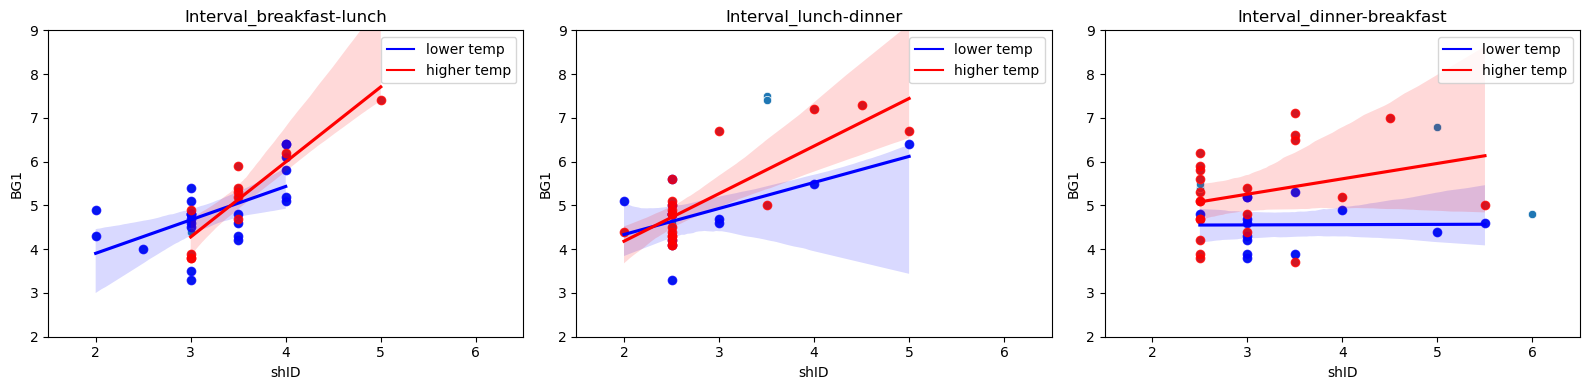

In [54]:
# BG1:Temp
fig,ax = plt.subplots(nrows=1,ncols=len(dfs),figsize=(16,4))

for i,d in enumerate(dfs):
   
    sns.scatterplot(data=d,x='shID',y='BG1',ax=ax[i])
    sns.regplot(data=d[d['Temp']<Temp_threshold],x='shID',y='BG1',ax=ax[i],color='blue')
    sns.regplot(data=d[d['Temp']>Temp_threshold],x='shID',y='BG1',ax=ax[i],color='red')
    ax[i].set_title(d.name)
    ax[i].set_xlim(1.5,6.5)
    ax[i].set_ylim(2,9)
    
    blue_line = plt.Line2D([], [], color='blue', label='lower temp')
    red_line = plt.Line2D([], [], color='red', label='higher temp')
    ax[i].legend(handles=[blue_line, red_line])
        
        
plt.tight_layout();

#### Results

['DV'] + ['BG1'] + ['Temp'] It is evident that the effect of blood glucose level on insulin dose increases at higher temperatures, with a more pronounced dynamic in the morning that gradually diminishes towards the evening. On the other hand, the impact of temperature on the effect of carb intake is more varied, displaying a notable decrease during the lunch-dinner interval.

Considering the role of temperature as a feature for future machine learning (ML) models in diabetes management shows promise. By incorporating temperature data into the ML algorithm, it becomes possible to capture the nuanced relationship between temperature, blood glucose level, carb intake, and insulin dose. This can lead to improved predictions and personalized insulin dosage recommendations based on varying environmental conditions.

## Conclusion

In summary, the analysis demonstrates that all the features examined have an effect on the target label, except for ['bID']. The correlation between BG1, DV, and shID is not always straightforward and can be influenced by various factors, resulting in a complex relationship.

As a result, it is recommended to include all the features, excluding ['bID'], in the prediction algorithm. 

Importantly, the analysis demonstrated different patterns across intervals and the influence of external factors on the required insulin dose. This formed the basis for interval-specific prediction tasks, incorporating a broader range of features than the traditional calculations of pre-meal glucose level (BG1) and dietary value (DV) alone.
